# Ejercicios Pair Programming - Modulo 2 - Sprint 1 
## Lección 9 - Estadística III - Tablas de contingencia, correlación, sesgos e intervalos de confianza
### Judith Mellidez y Sonia Ruiz

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.

__Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.__

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

__Objetivos__

Los objetivos de hoy son:
1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Tabla de contingencia

In [49]:
#Importamos todas las librerias necesarias para poder exporar y analizar nuestros datos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from pydataset import data
import scipy.stats as st

In [2]:
#Almacenamos el fichero de datos en una variable como un dataframe y observamos sus 5 primeras filas.
df=pd.read_csv('Estadistica_leccion1y2/world_risk_index.csv')
df.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


In [4]:
#Realizamos una exploacion incial del dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


In [3]:
df.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1916.000000,1917.000000
mean,7.551763,15.388336,48.075759,30.739431,70.438289,43.090511,2016.049557
std,5.553257,10.240135,13.835666,15.667030,15.038854,13.551156,3.182045
min,0.020000,0.050000,14.310000,8.260000,31.590000,11.160000,2011.000000
25%,3.740000,10.160000,37.040000,17.790000,59.330000,33.192500,2013.000000
50%,6.520000,12.760000,47.100000,25.400000,74.230000,43.080000,2016.000000
75%,9.400000,16.450000,60.060000,42.640000,83.000000,53.065000,2019.000000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000,2021.000000


In [5]:
df.describe(include='object')

,Region,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
count,1917,1917,1916,1913,1917
unique,306,5,5,5,5
top,Vanuatu,Very Low,Very Low,Very Low,Very Low
freq,11,393,393,386,390


In [7]:
#Creamos una tabla de contigencia con las variables categoricas 'Exposure Category'
#  y 'Vulnerability Category'.
tabla_contingencia=pd.crosstab(df['Exposure Category'], df['Vulnerability Category'])
tabla_contingencia

Vulnerability Category,High,Low,Medium,Very High,Very Low
Exposure Category,,,,,
High,53,59,96,122,49
Low,60,76,49,76,118
Medium,65,54,86,122,53
Very High,143,71,90,43,35
Very Low,59,121,63,19,131


    - En la tabla de contingencia obtenida podemos observar que la relacion entre "vulnerability category" y "exposure category", cuando "vulnerability" es "very high", se registran mas datos con "exposure" "high". Y cuando exposure es "very hight" se registran valores de "vulnerability" "hight". 
    Observamos más relaciones similares a esta, entre pares de variables.

- Coeficiente de correlación de las variables numéricas del dataset.

In [15]:
#Hayamos el coeficiente de correlacion de las variables numericas (cuantitativas).
coef_correlacion=df.corr()
coef_correlacion

/tmp/ipykernel_14609/1432544334.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coef_correlacion=df.corr()


,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
WRI,1.000000,0.917621,0.442428,0.381190,0.455432,0.413275,0.026040
Exposure,0.917621,1.000000,0.104787,0.066020,0.145526,0.087737,0.062133
Vulnerability,0.442428,0.104787,1.000000,0.932919,0.931140,0.945389,-0.082364
Susceptibility,0.381190,0.066020,0.932919,1.000000,0.781126,0.837977,-0.055962
Lack of Coping Capabilities,0.455432,0.145526,0.931140,0.781126,1.000000,0.833061,0.038186
Lack of Adaptive Capacities,0.413275,0.087737,0.945389,0.837977,0.833061,1.000000,-0.230083
Year,0.026040,0.062133,-0.082364,-0.055962,0.038186,-0.230083,1.000000


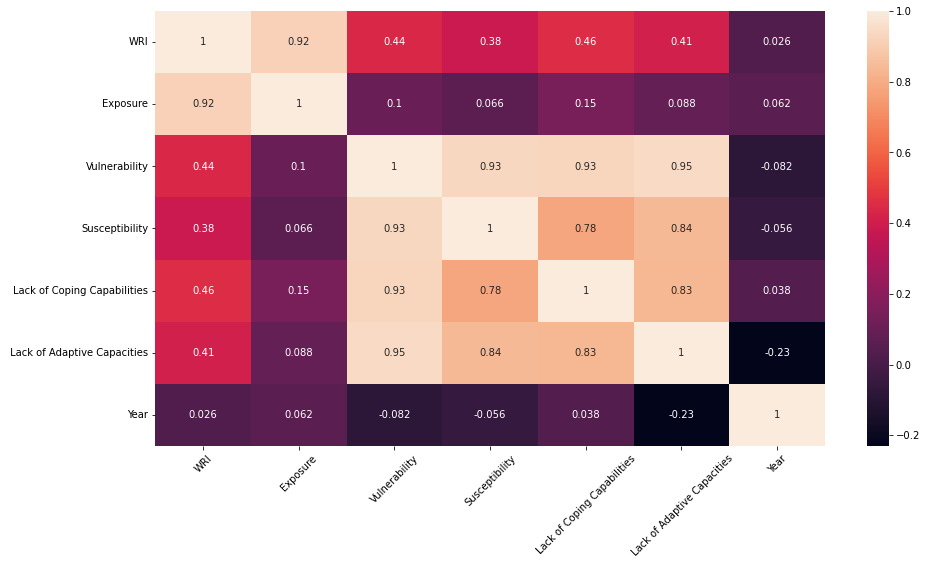

In [25]:
#Creamos un mapa de calor (Heatmap) con los coeficientes de correlacion de las variables
#  numericas de nuestro dataset.
plt.figure(figsize=(15,8))
fig=sns.heatmap(coef_correlacion,annot=True)
plt.xticks(rotation=45)
plt.show()

     - El coeficiente de correlacion de Pearson esta comprendido entre -1 y 1, indicando ambos valores una corelacion perfecta (negativa o positiva respetivamente):
          - Correlacion muy alta (0.8 - <1): observamos que las variables numericas que presentan esta correlacion son:
               "Exposure" y "WRI", "Vulnerability" y "Susceptibility", "Vulnerability" y "Lack of Coping Capabilities",
               "Vulnerability" y "Lack of Adaptive Capacities", "Lack of Coping Capabilities" y "Lack of Adaptive Capacities",
               "Susceptibility" y "Lack of Adaptive Capacities"
          - Correlacion  alta (0,6 - 0,8): "Susceptibility" y "Lack of Coping Capabilities".
          - Correlacion moderada (0,4 - 0,6): "Vulnerability" y "WRI", "Lack of Coping Capabilities" y "WRI",
               "Lack of Adaptive Capacities" y "WRI".
          - Correlacion baja (0,2 - 0,4): "Susceptibility" y "WRI", "Year" y "Lack of Adaptive Capacities"
               (con correlacion negativa).
          - Correlacion muy baja (0 - 0,2):"Year" y "WRI", "Exposure" y "Vulnerability","Exposure" y "Susceptibility","Exposure" y
               "Lack of Coping Capabilities", "Exposure" y "Lack of Adaptive Capacities", "Exposure" y "Year",
               "Year" y "Vulnerability" (con correlacion negativa), "Year" y "Susceptibility", "Year" y "Lack of Coping
               Capabilities", "Year" y "Lack of Adaptive Capacities"(con correlacion negativa).

- Sesgos de alguna de las variables numéricas del dataset.

In [39]:
#Obtenemos el valor del sesgo para dos variables numericas.
skewness=skew(df['Exposure'])
print('El valor del sesgo para la variable Exposure es;', skewness)
skewness2=skew(df['Lack of Coping Capabilities'])
print('El valor del sesgo para la variable Lack of Coping Capabilities es;', skewness2)

El valor del sesgo para la variable Exposure es; 2.7550733318898852
El valor del sesgo para la variable Lack of Coping Capabilities es; -0.6140122516645456


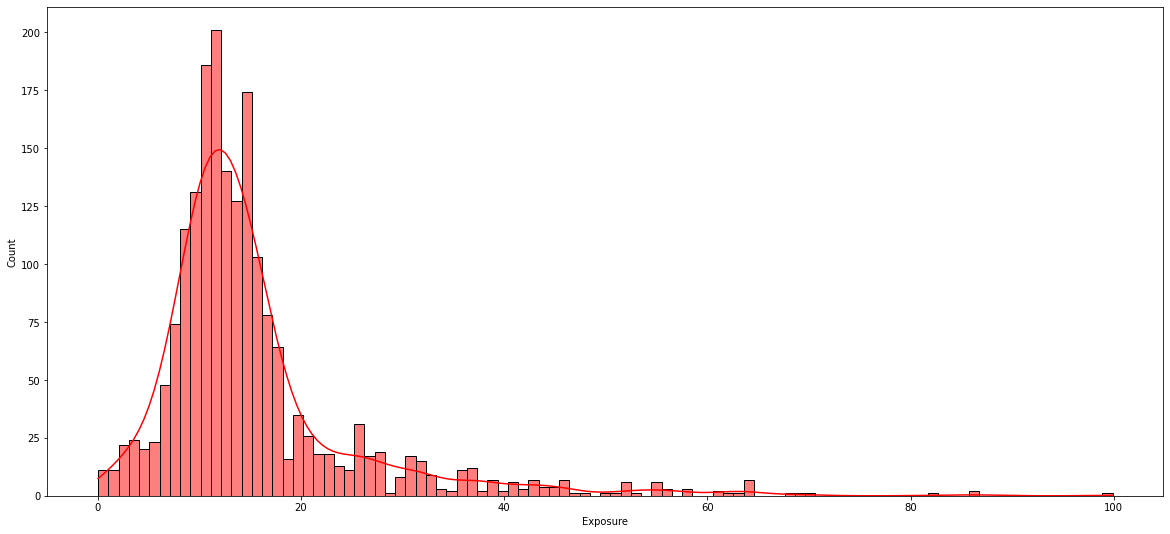

In [38]:
#Creamos un histograma con los valores de las variables numericas Exposure y Lack of Coping Capabilities.
plt.figure(figsize=(20,9))
sns.histplot(df['Exposure'],color='red',kde=True)
fig.set_title('Histograma sesgos de WRI') #Hemos intentado poner el titulo pero no aparece.
plt.show()

    - Con los valores obtenidos de skewness podemos decir que la variable "Exposure" esta sesgada a la derecha (2,75, un valor positivo), como tambien podemos observar en el histplot donde tenemos la mayoria de valores concentrados en la parte izquierda.

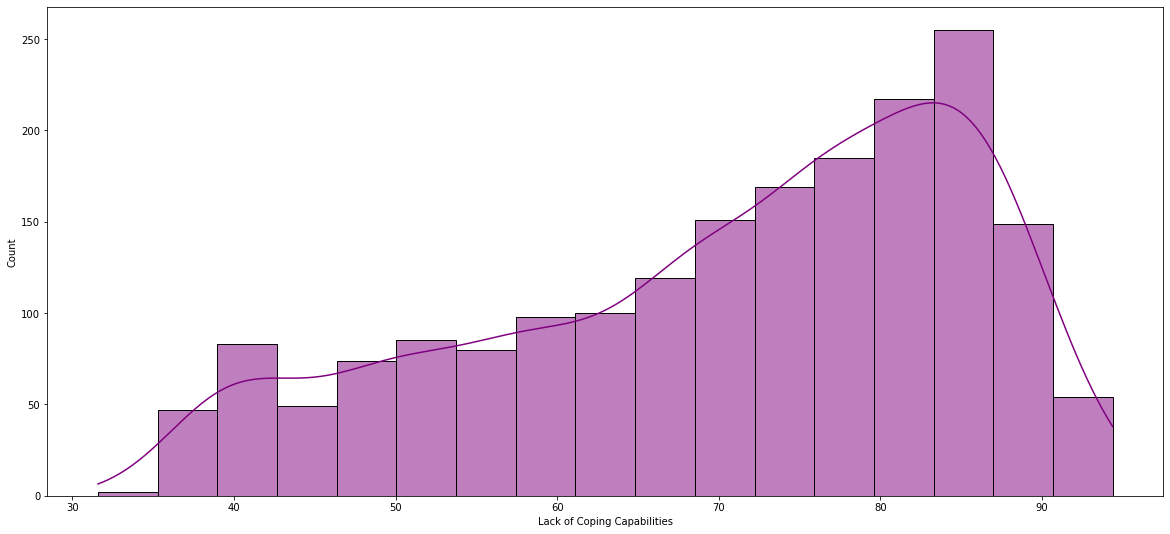

In [48]:
plt.figure(figsize=(20,9))
sns.histplot(df['Lack of Coping Capabilities'],color='purple',kde=True)
fig.set_title('Histograma sesgos de WRI') #Hemos intentado poner el titulo pero no aparece.
plt.show()

    - Por otra parte, la variable numerica "Lack of Coping Capabilities" esta sesgada hacia la izquierda (-0,61, un valor negativo), ya que tenemos la mayoria de los valores concentrados en la parte derecha del histplot.

- Intervalo de confianza de algunas de las variables numéricas del dataset

    - Con el intervalo de confianza podemos acotar entre dos valores donde se estima que se encuentre el valor de una variable el con el porcentaje de confianza que escojamos.

    - Observamos que los intervalos de confianza obtenidos en los 4 casos siguientes nos indican que hay un 95% de probabilidad de que la media real de la variable "Susceptibility" y "Vulnerability" se encuentren en el intervalo calculado para cada una respetivamente.

In [54]:
#Obtenemos los intervalos de confianza para la variable Susceptibility, sin aplicar la desviacion estandar (scale), ya que damos
#  por hecho que los datos tendran una distribucion normal.
datos_int_conf_exp=df['Susceptibility']
print(st.t.interval(alpha=0.95, df=len(datos_int_conf_exp)-1, loc=np.mean(datos_int_conf_exp)))
print(np.mean(datos_int_conf_exp))

(28.778228512093385, 32.700634294375064)
30.739431403234224


In [55]:
#Obtenemos los intervalos de confianza para la variable Susceptibility, aplicando la desviacion estandar (scale).
datos_int_conf_exp=df['Susceptibility']
print(st.t.interval(alpha=0.95, df=len(datos_int_conf_exp)-1, loc=np.mean(datos_int_conf_exp), scale=st.sem(datos_int_conf_exp)))
print(np.mean(datos_int_conf_exp))

(30.037656004622274, 31.441206801846175)
30.739431403234224


In [56]:
#Obtenemos los intervalos de confianza para la variable Vulnerability, sin aplicar la desviacion estandar (scale).
datos_int_conf_exp2=df['Vulnerability']
print(st.t.interval(alpha=0.95, df=len(datos_int_conf_exp2)-1, loc=np.mean(datos_int_conf_exp2)))
print(np.mean(datos_int_conf_exp2))

(46.11455610729422, 50.03696188957589)
48.075758998435056


In [57]:
#Obtenemos los intervalos de confianza para la variable Vulnerability, sin aplicar la desviacion estandar (scale).
datos_int_conf_exp2=df['Vulnerability']
print(st.t.interval(alpha=0.95, df=len(datos_int_conf_exp2)-1, loc=np.mean(datos_int_conf_exp2), scale=st.sem(datos_int_conf_exp)))
print(np.mean(datos_int_conf_exp2))

(47.373983599823106, 48.777534397047006)
48.075758998435056


2. Interpretación de los resultados.
- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

    - Los comentarios de cada uno de los resultados han sido redactados acolacion de la realizacion de los ejercicios.

Happy coding 📊📈📉